# Web crawler pokemon
We use python web crawler to collect data from [Fandom](https://www.fandom.com/).

# testing (only 152_Chikorita)

In [1]:
import requests
from bs4 import BeautifulSoup
import os

import pathlib
pathlib.Path().absolute()

WindowsPath('C:/Users/songz/OneDrive/文件/University of bath 課程/semester 2/Research Project Preparation')

In [2]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

In [3]:
pokemon_search_api = "https://pokemon.fandom.com/wiki/Chikorita"
r = requests.get(pokemon_search_api)
print(r.status_code)
print(type(r))

200
<class 'requests.models.Response'>


In [4]:
html_doc = r.text
print(type(html_doc))
print(len(html_doc))
# print(html_doc)

<class 'str'>
891847


In [5]:
soup = BeautifulSoup(html_doc)
# print(type(soup))

## Get pokemon name and index

In [6]:
pokemon_name = ".page-header__title"
name = soup.select(pokemon_name)[0]
# print(type(name))
name.text

'Chikorita'

In [7]:
pokemon_index = ".pi-secondary-background+ .pi-border-color .pi-font.pi-item-spacing:nth-child(2)"
index = soup.select(pokemon_index)[0]
index.text

'152'

## Create folders and save picture into the folder
folder named as "index_pokemon name" e.g. 152_Chikorita

In [8]:
### Create folders for each pokemon
foldername = index.text + '_' + name.text
print(type(foldername))
createFolder('./Pokemon Dataset/{}/'.format(foldername))

<class 'str'>


In [9]:
### File name for the first picture
first_image = ".pi-image-thumbnail"
first = soup.select(first_image)[0]
first_file_name = first.get("data-image-name")
first_file_name

'152Chikorita.png'

In [10]:
### File url for the first picture
first_file_url = first.get("src")
first_file_url

'https://vignette.wikia.nocookie.net/pokemon/images/b/bf/152Chikorita.png/revision/latest/scale-to-width-down/350?cb=20140329012502'

In [11]:
### download the first picture to the folder
r = requests.get(first_file_url)

location = './Pokemon Dataset/{}/{}'.format(foldername, first_file_name)

with open(location, 'wb') as f:
    f.write(r.content)

In [12]:
### save gallery pictures
gallery_image = ".thumb"
gallery_image_all = soup.select(gallery_image)

for i in range(len(gallery_image_all)):
    temp_image = gallery_image_all[i].find_all('img')
    temp_image_name = temp_image[0].get("data-image-name") ### File name for the gallery pictures
    temp_image_url = temp_image[0].get("src") ### File url for the gallery pictures

    r = requests.get(temp_image_url)

    location = './Pokemon Dataset/{}/{}'.format(foldername, temp_image_name)

    with open(location, 'wb') as f:
        f.write(r.content)

# Main code

## List of pokemon

In [13]:
list_of_pokemon_api = "https://pokemon.fandom.com/wiki/List_of_Pok%C3%A9mon#Generation_II"
r = requests.get(list_of_pokemon_api)
print(r.status_code)
print(type(r))

200
<class 'requests.models.Response'>


<class 'str'>
1310164
<!doctype html>
<html lang="en" dir="ltr" class="">
<head>

<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
	<meta name="viewport" content="width=device-width, user-scalable=yes">
<meta name="generator" content="MediaWiki 1.19.24" />
<meta name="keywords" content="Pokémon Wiki,pokemon,List of Pokémon,List of Generation I Pokémon,Kanto Pokédex,List of Generation II Pokémon,List of Generation III Pokémon,Hoenn Pokédex,List of Generation IV Pokémon,Sinnoh Pokédex,List of Generation V Pokémon,Unova Pokédex,List of Generation VI Pokémon" />
<meta name="description" content="This is a complete list of all 890 species of Pokémon currently known to exist. Each Pokémon's entry on this list includes its number in the National Pokédex, its sprite, its name in both English and Japanese, the official romanization of its Japanese name, its types (most Pokémon with alternate..." />
<meta name="twitter:card" content="summary" />
<meta name="twitter:site" conte
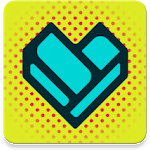
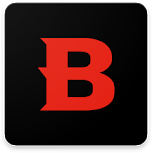

In [14]:
html_doc = r.text
print(type(html_doc))
print(len(html_doc))
print(html_doc)

In [15]:
soup = BeautifulSoup(html_doc)

In [16]:
list_of_pokemon_name = "td~ td+ td > a"
name = soup.select(list_of_pokemon_name)
name_list = []
for i in range(len(name)):
    name_list.append(name[i].text)
# name_list

In [17]:
list_of_pokemon_index = ".wikitable td:nth-child(1)"
index = soup.select(list_of_pokemon_index)
index_list = []
for i in range(len(index)):
    ind = index[i].text.strip()
    index_list.append(ind)
# index_list

In [18]:
import pandas as pd
pokemon_index = pd.DataFrame(list(zip(index_list, name_list)), columns =['index', 'name']) 
pokemon_index

,index,name
0,001,Bulbasaur
1,002,Ivysaur
2,003,Venusaur
3,004,Charmander
4,005,Charmeleon
...,...,...
885,886,Drakloak
886,887,Dragapult
887,888,Zacian
888,889,Zamazenta


## Download data

In [19]:
from urllib.request import build_opener
from urllib.request import install_opener

opener = build_opener()
opener.addheaders = [('User-Agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36')]
install_opener(opener)

In [20]:
for index in index_list:   
    try:
        ### set up 
        pokemon_name = list(pokemon_index['name'][pokemon_index['index'] == index])[0]
        pokemon_search_api = "https://pokemon.fandom.com/wiki/{}".format(pokemon_name)
            
        r = requests.get(pokemon_search_api)
        html_doc = r.text
        soup = BeautifulSoup(html_doc)
        

        ### Create folders for each pokemon
        foldername = index + '_' + pokemon_name
        createFolder('./Pokemon Dataset/{}/'.format(foldername))

        ### File name for the first picture
        first_image = ".pi-image-thumbnail"
        first = soup.select(first_image)[0]
        first_file_name = first.get("data-image-name")

        ### File url for the first picture
        first_file_url = first.get("src")

        ### download the first picture to the folder
        r_first_url = requests.get(first_file_url)
        location = './Pokemon Dataset/{}/{}'.format(foldername, first_file_name)
        with open(location, 'wb') as f:
            f.write(r_first_url.content)


        ### save gallery pictures
        gallery_image = ".thumb"
        gallery_image_all = soup.select(gallery_image)

        for i in range(len(gallery_image_all)):
            temp_image = gallery_image_all[i].find_all('img')
            temp_image_name = temp_image[0].get("data-image-name") ### File name for the gallery pictures
            temp_image_url = temp_image[0].get("src") ### File url for the gallery pictures

            r_gallery_url = requests.get(temp_image_url)

            location = './Pokemon Dataset/{}/{}'.format(foldername, temp_image_name)

            with open(location, 'wb') as f:
                f.write(r_gallery_url.content)
#         print("{} dataset is downloaded......".format(pokemon_name))
        
    except:
        print("Fail to download {} {}".format(index, pokemon_name))

Fail to download 008 Wartortle
Fail to download 133 Eevee
Fail to download 286 Breloom
Error: Creating directory. ./Pokemon Dataset/772_Type: Null/
Fail to download 772 Type: Null


In [21]:
# download 008 Wartortle
pokemon_search_api = "https://pokemon.fandom.com/wiki/Wartortle"
r = requests.get(pokemon_search_api)
html_doc = r.text
soup = BeautifulSoup(html_doc)

### Create folders for each pokemon
foldername = '008_Wartortle'
createFolder('./Pokemon Dataset/{}/'.format(foldername))

### File name for the first picture
first_image = ".pi-image-thumbnail"
first = soup.select(first_image)[0]
first_file_name = first.get("data-image-name")

### File url for the first picture
first_file_url = first.get("src")

### download the first picture to the folder
r_first_url = requests.get(first_file_url)
location = './Pokemon Dataset/{}/{}'.format(foldername, first_file_name)
with open(location, 'wb') as f:
    f.write(r_first_url.content)


### save gallery pictures
gallery_image = ".thumb"
gallery_image_all = soup.select(gallery_image)

for i in range(1,len(gallery_image_all)):
    temp_image = gallery_image_all[i].find_all('img')
    temp_image_name = temp_image[0].get("data-image-name") ### File name for the gallery pictures
    temp_image_url = temp_image[0].get("src") ### File url for the gallery pictures

    r_gallery_url = requests.get(temp_image_url)

    location = './Pokemon Dataset/{}/{}'.format(foldername, temp_image_name)

    with open(location, 'wb') as f:
        f.write(r_gallery_url.content)
print('008_Wartortle is downloaded')

008_Wartortle is downloaded


In [22]:
# download 133 Eevee
pokemon_search_api = "https://pokemon.fandom.com/wiki/Eevee"
r = requests.get(pokemon_search_api)
html_doc = r.text
soup = BeautifulSoup(html_doc)

### Create folders for each pokemon
foldername = '133_Eevee'
createFolder('./Pokemon Dataset/{}/'.format(foldername))

### File name for the first picture
first_image = ".pi-image-thumbnail"
first = soup.select(first_image)[0]
first_file_name = first.get("data-image-name")

### File url for the first picture
first_file_url = first.get("src")

### download the first picture to the folder
r_first_url = requests.get(first_file_url)
location = './Pokemon Dataset/{}/{}'.format(foldername, first_file_name)
with open(location, 'wb') as f:
    f.write(r_first_url.content)


### save gallery pictures
gallery_image = "#gallery-8 .accent"
gallery_image_all = soup.select(gallery_image)

for i in range((len(gallery_image_all)-2)):  ### The last two photos are damaged
    temp_image = gallery_image_all[i].find_all('img')
    temp_image_name = temp_image[0].get("data-image-name") ### File name for the gallery pictures
    temp_image_url = temp_image[0].get("src") ### File url for the gallery pictures

    r_gallery_url = requests.get(temp_image_url)

    location = './Pokemon Dataset/{}/{}'.format(foldername, temp_image_name)

    with open(location, 'wb') as f:
        f.write(r_gallery_url.content)
print('133_Eevee is downloaded')

133_Eevee is downloaded


In [23]:
# download 286 Breloom
## 第一次載的時候照片為損壞，所以有成功載下來

In [24]:
# download 772 Type: Null
pokemon_search_api = "https://pokemon.fandom.com/wiki/Type:_Null"
r = requests.get(pokemon_search_api)
html_doc = r.text
soup = BeautifulSoup(html_doc)
        
### Create folders for each pokemon
foldername = '772_Type_Null'
createFolder('./Pokemon Dataset/{}/'.format(foldername))

### File name for the first picture
first_image = ".pi-image-thumbnail"
first = soup.select(first_image)[0]
first_file_name = first.get("data-image-name")

### File url for the first picture
first_file_url = first.get("src")

### download the first picture to the folder
r_first_url = requests.get(first_file_url)
location = './Pokemon Dataset/{}/{}'.format(foldername, first_file_name)
with open(location, 'wb') as f:
    f.write(r_first_url.content)


### save gallery pictures
gallery_image = ".thumb"
gallery_image_all = soup.select(gallery_image)

for i in range(len(gallery_image_all)):
    temp_image = gallery_image_all[i].find_all('img')
    temp_image_name = temp_image[0].get("data-image-name") ### File name for the gallery pictures
    temp_image_url = temp_image[0].get("src") ### File url for the gallery pictures

    r_gallery_url = requests.get(temp_image_url)

    location = './Pokemon Dataset/{}/{}'.format(foldername, temp_image_name)

    with open(location, 'wb') as f:
        f.write(r_gallery_url.content)
print('772_Type_Null is downloaded')

772_Type_Null is downloaded
